___
# HW #4

____



### Name: Tiancheng Liu

____
![kde](https://blogs.sas.com/content/iml/files/2016/07/kdecomponents1.png)

## Problem #1 (10pts):
### KDE and Rug Plots (from scratch!)

You are earning some extra money working in a restaurant while you complete your data science degree. In a conversation with other employees, the topic of tips comes up: do people tip 15% or 20%? An "argument" breaks out before you interupt and point out that there is a distribution of tips, not a fixed value. In fact, you propose that the distribution of tips is normally distributed. To your surprise, you learn that one of the waitresses is also a data scientist who points out that there is no reason to believe that the distribution of tips is normal and that the mean and standard deviation have any meaning. You propose to answer these questions by building a KDE of tip data! 

✍🏻 For this problem, do not use a library to compute the KDE - do it yourself using basic Python. Follow these steps:
* get the standard "tips" dataset (which is in Seaborn)


In [1]:
import seaborn as sns
import numpy as np
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


* compute the percentage tip from the data, and store those values in an array


In [2]:
perc = (tips.tip / tips.total_bill)*100
perc

0       5.944673
1      16.054159
2      16.658734
3      13.978041
4      14.680765
         ...    
239    20.392697
240     7.358352
241     8.822232
242     9.820426
243    15.974441
Length: 244, dtype: float64

* in `matplotlib`, plot a vertical line from 0 to 1 for each tip percentage (there are many ways to do this, but an easy way is to use [`vlines`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.vlines.html)); you should have a vertical line marking each percentage tip in the dataset


✅Not sure if this is what you wanted, because this doesn't look right to me.There are other plots that is better at showing this kind information. Like the lite version of kde, histogram.

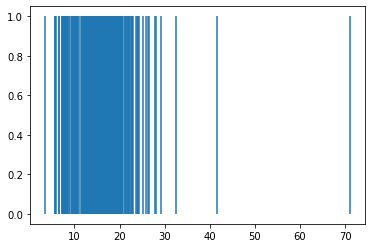

In [3]:
import matplotlib.pyplot as plt
plt.vlines(x = perc, ymin = 0, ymax = 1)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  1.,  1.,  0.,
         4.,  0.,  5.,  1.,  3.,  0.,  2.,  0.,  3.,  1.,  4.,  4.,  5.,
         1.,  1.,  0.,  6.,  4.,  4.,  5.,  3.,  6.,  1.,  7.,  7., 10.,
         4.,  7.,  7., 11.,  7.,  6.,  6.,  3.,  4.,  3.,  5.,  5.,  3.,
         7.,  3.,  4.,  4.,  4.,  7.,  8.,  5.,  5.,  4.,  1.,  1.,  2.,
         0.,  4.,  0.,  2.,  3.,  1.,  0.,  1.,  1.,  3.,  0.,  0.,  0.,
         1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

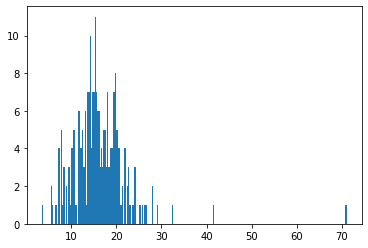

In [4]:
plt.hist(perc,bins = 244)

* adjust the figure so that you can view the data well, perhaps using something like `plt.figure(figsize=(20,5))`


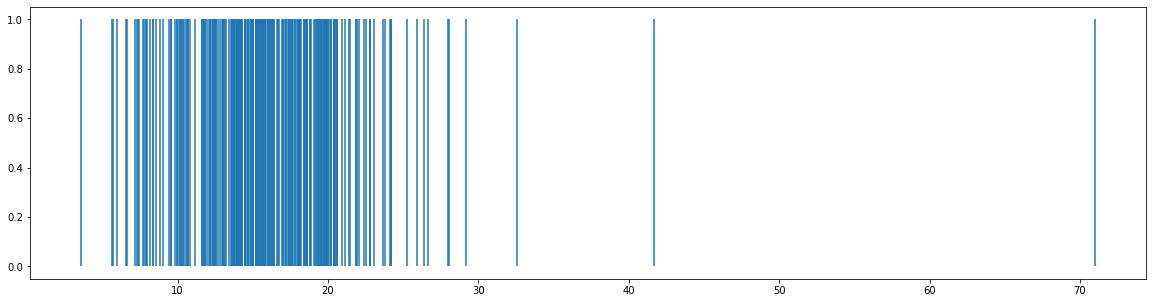

In [5]:
plt.figure(figsize=(20,5))
plt.vlines(x = perc, ymin = 0, ymax = 1)

* from this plot, do you think that tips are normally distributed? why or why not? 


✅Answer:

Yes, the distribution shows that tips are roughly normal distributed, heavy in the center and less crowded at the edge.

* write a function called `my_kde` that reads in three variables: the _x_ values you want to plot over (perhaps use `linspace` over the range of percentage tip), the array of percent tips _pt_ you computed above and the width _w_ of the kernel; make your kernel have the form $$K(x,pt) = \exp(-(x - pt)^2/2w^2)/(w\sqrt{2\pi})$$ and return the [sum of the kernels](https://en.wikipedia.org/wiki/Kernel_density_estimation) over all of the tip percentages (note that this will be an array over the _x_ values)


In [6]:
def my_kde(x,pt,w):
  kde = np.zeros(len(x))
  
  for tip in pt:
    kde += np.exp(-(x - tip)**2/(2*w**2))/(np.sqrt(2*np.pi)*w)
    
  return kde

* plot your kde with the vertical lines you produced above - note that the vertical lines (if you made them from _0_ to _1_) will look like a rug plot,


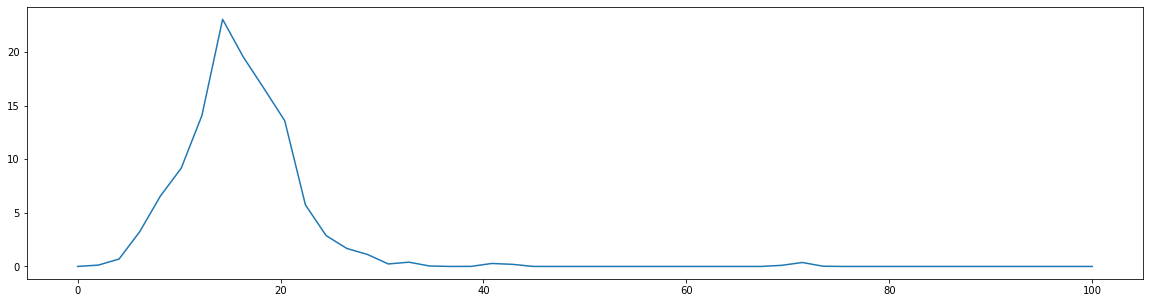

In [7]:
x = np.linspace(0, 100)
plt.figure(figsize=(20,5))
plt.plot(x, my_kde(x, perc, 1))

* make several plots with different values of the width _w_ (perhaps in the range _0.2_ to _6_); which value of _w_ is best?


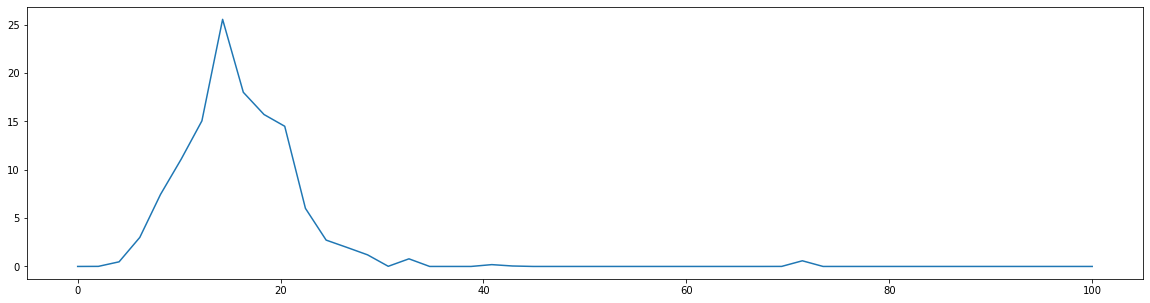

In [8]:
x = np.linspace(0, 100)
plt.figure(figsize=(20,5))
plt.plot(x, my_kde(x, perc, 0.5))

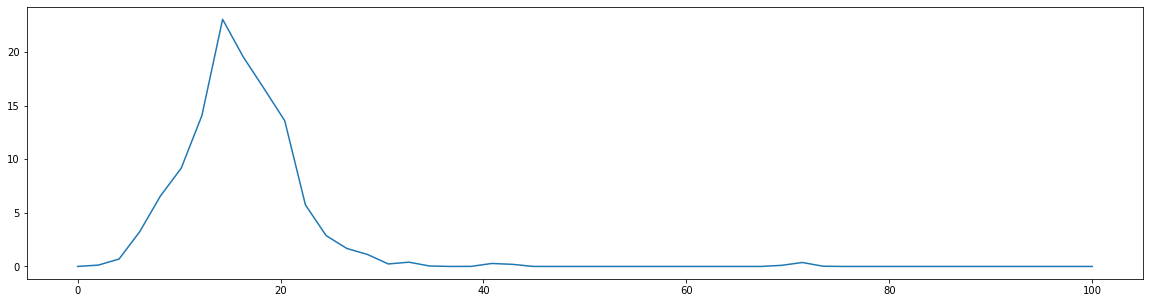

In [9]:
x = np.linspace(0, 100)
plt.figure(figsize=(20,5))
plt.plot(x, my_kde(x, perc, 1))

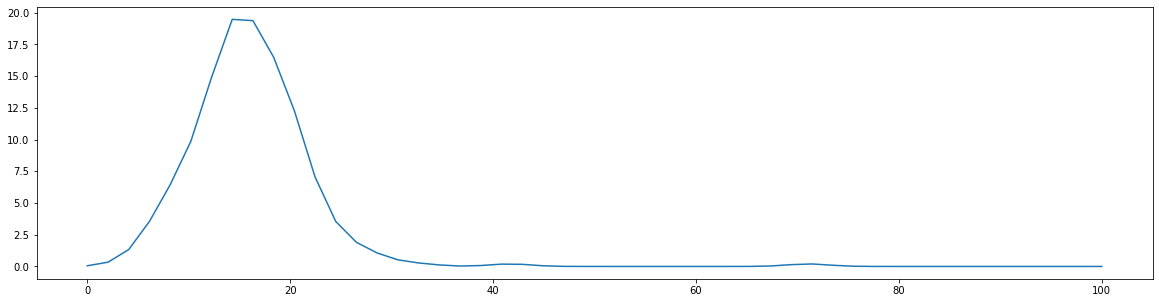

In [10]:
x = np.linspace(0, 100)
plt.figure(figsize=(20,5))
plt.plot(x, my_kde(x, perc, 2))

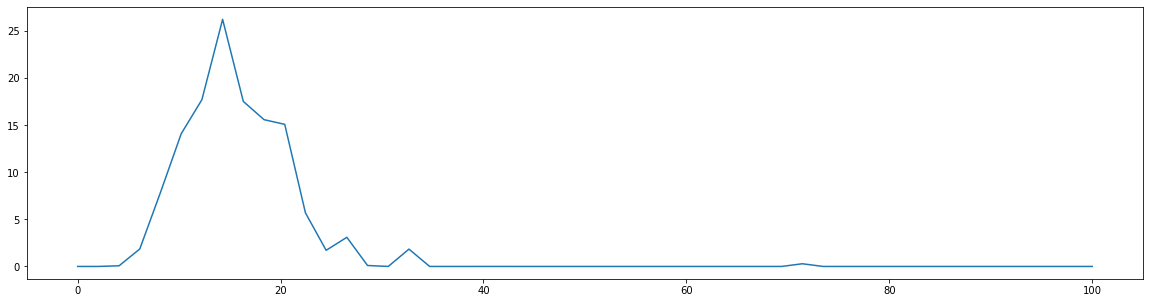

In [11]:
x = np.linspace(0, 100)
plt.figure(figsize=(20,5))
plt.plot(x, my_kde(x, perc, 0.2))

✅Answer:

I believe 0.2 as width is the best as it shows more details.

* using NumPy, compute the mean and standard deviation of the percent tips, construct a normal distribution from those values and add that to your plot: this is the best normal distribution the data suggests and it many or may not look like the KDE (hint: `plt.plot(x_vals, 100*np.exp(-(x_vals - np.mean(tip_perc))**2/(2*np.var(tip_perc)))/(np.std(tip_perc)*np.sqrt(2*np.pi)))`)


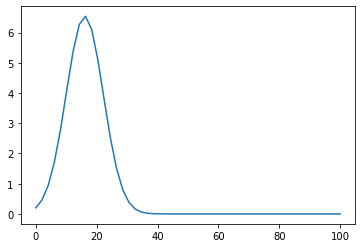

In [12]:
mean_tips = np.mean(perc)
std_tips = np.std(perc)

plt.plot(x, 100*np.exp(-(x - np.mean(perc))**2/(2*np.var(perc)))/(np.std(perc)*np.sqrt(2*np.pi)))

* if you make your width _w_ too large, does the KDE predict anything impossible? 


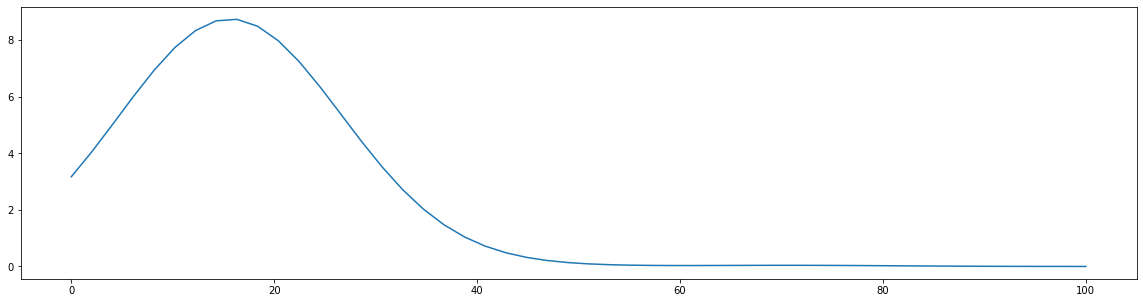

In [13]:
x = np.linspace(0, 100)
plt.figure(figsize=(20,5))
plt.plot(x, my_kde(x, perc, 10))

✅Answer:

Say we set the width to 10 or 20, the plot became more and more flat, thus there is no accuracy in the prediction, so it is impossible to predict anything with large width.

* finally, answer the question: do you think this is a normal distribution? would you arrive at a different conclusion depending on which width _w_ you pick? 


✅Answer:

I will still believe this is a normal distribution, but more like a biased normal distribution, or we could call it a skewed distribution. With larger width this doesn't look like a normal distribution.




_If you need a hint on some of the code, feel free to peek at the code below. If you use this code, add comments to indicate that you understand what it is doing, and be sure that it is PEP-8 compliant._


In [14]:
# import seaborn as sns
# import numpy as np
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20,5))

# df = sns.load_dataset("tips")
# tip_perc = np.array(df["tip"]/df["total_bill"])*100


# def my_kde(x_vals, tips, width):
  
#   kde = np.zeros(len(x_vals))

#   for tip in tips:

#     kde += np.exp(-(x_vals - tip)**2/(2*width**2))/(np.sqrt(2*np.pi)*width)

#   return kde


# plt.vlines(tip_perc, 0, 1)

# x_vals = np.linspace(0,75, 300)

# plt.plot(x_vals, my_kde(x_vals, tip_perc, 0.5), label="w=0.5")
# plt.plot(x_vals, my_kde(x_vals, tip_perc, 1.0), label="w=1.0")
# plt.plot(x_vals, my_kde(x_vals, tip_perc, 2.0), label="w=2.0")
# plt.plot(x_vals, 100*np.exp(-(x_vals - np.mean(tip_perc))**2/(2*np.var(tip_perc)))/(np.std(tip_perc)*np.sqrt(2*np.pi)))
# plt.grid(alpha=0.2)
# plt.title("KDE and Rug Plot for Tip Data")
# plt.xlabel("% tip")
# plt.ylabel("probability")
# plt.legend()

____
![project](https://miro.medium.com/max/1400/1*xf7i-aJrlKahzzfiM7Pxfw.png)
## Problem #2 (10pts)

### choosing a topic for your project

We are $\frac{1}{4}$ done with the semester, which means we are $\frac{1}{2}$ way to your midterm project. 

Your project should contain many technical, coding and visualization details. But, what is much more important is that there is a story. This week we will work on the story. 

Your project should be on a topic of interest to you. You will not be motivated to find a story if you are not interested in the topic. What you should be thinking about are topics that you want to work on: I won't suggest a topic to you. The topic can be something you already know about or something you want to learn about. For example, if you are an RA, you might choose to use data from that project. Or, if you want to learn more about American football, this project can be a way to do that. 

There are tradeoffs between choosing something you already know, because you might learn less than choosing something new, and choosing something you don't know about, because you might get less out of it. In the end, it's your choice - make a good one! 

If you want to build your own dataset, this is the time to start doing that. For this HW, you don't need to have your new dataset in hand, but enough that you can answer the questions. (Or, you might just use datasets prepared for you at [UCI](https://archive.ics.uci.edu/ml/index.php), `sklearn`, `Seaborn`, and so on.....) 

✍🏻 In a markdown cell below, answer these questions:
* name two topics that you are familiar with now, with a few sentence of what they are and why they are interesting to you,


✅Answer:

* MPG
* Iris

* do the same for two topics you wish to learn about,


✅Answer:

* House price prediction on Kaggle - https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
* The "digimon" database on Kaggle - https://www.kaggle.com/datasets/rtatman/digidb

* for all four of these topics, search the internet to see if you can find a dataset that you could use for that topic: are there good datasets for each topic? are there multiple datasets for each? 


✅Answer:

Yes, there are datasets for the topics I choose. There are on for each topic and they look good. The links are posted above.

* perform some very simple EDA on $4$ datasets, (put plots here; or, if there are plots on the internet already, simply cite the ones you used),


In [15]:
import pandas as pd
house = pd.read_csv("house.csv")
digimon = pd.read_csv("digimon.csv")
mpg = sns.load_dataset("mpg")
iris = sns.load_dataset("iris")


✅**Here for the mpg dataset**

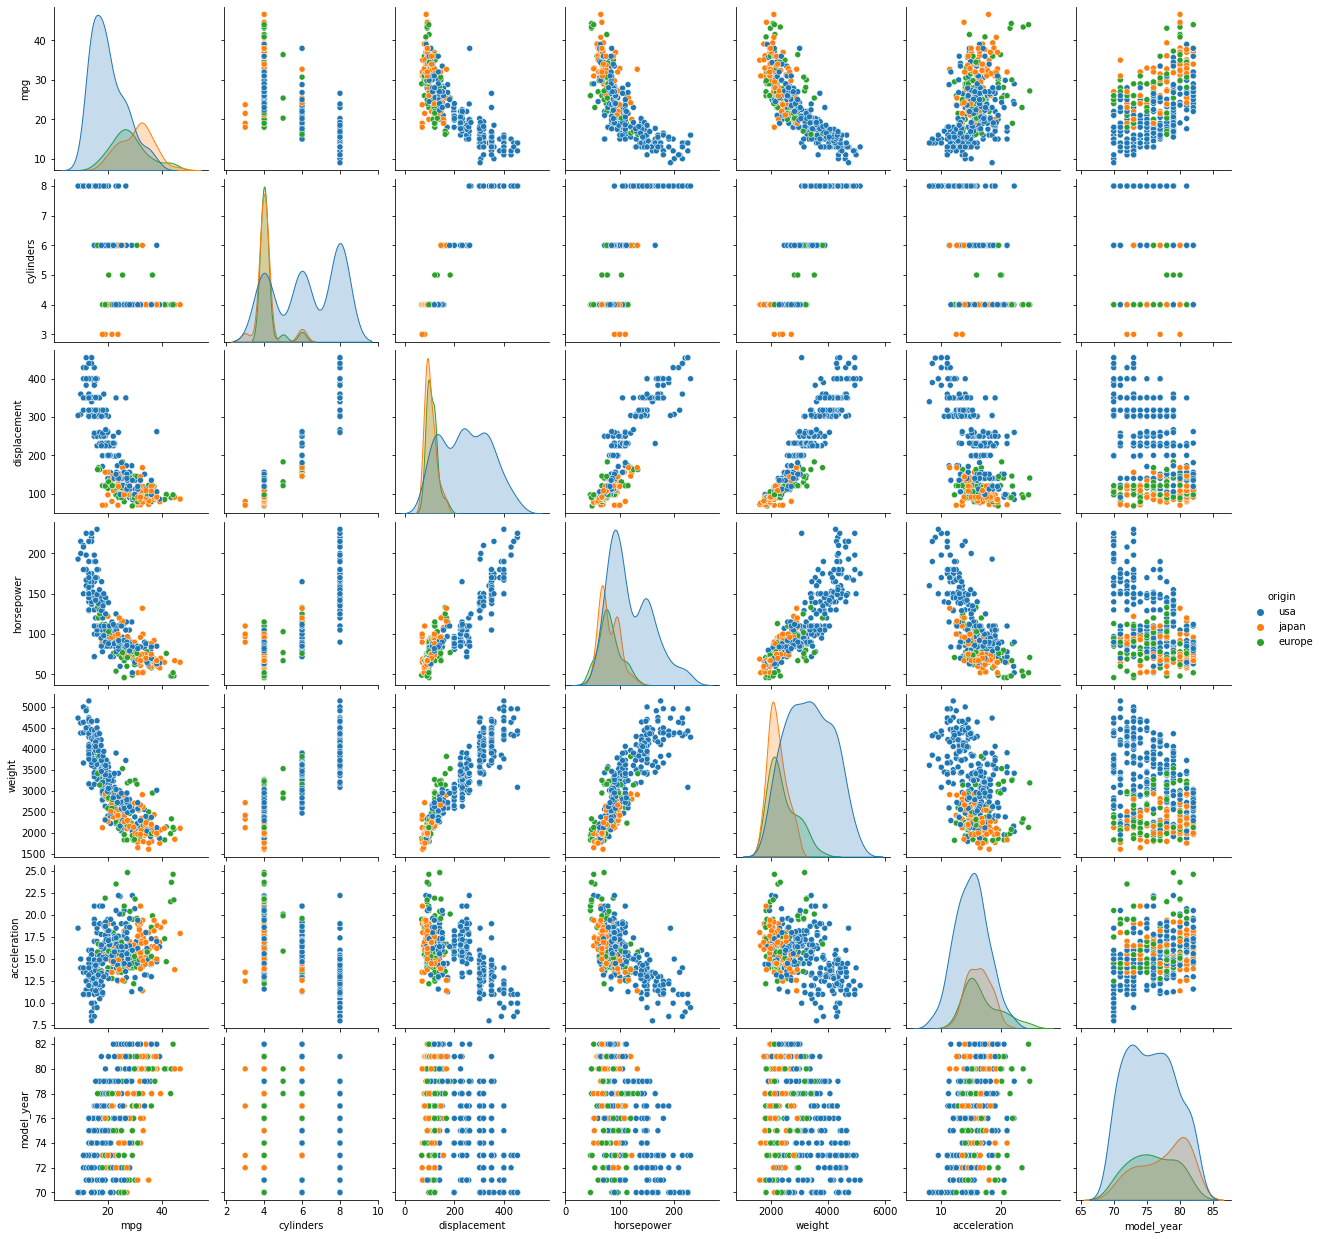

In [16]:

sns.pairplot(mpg,hue = "origin")

In [96]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [97]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


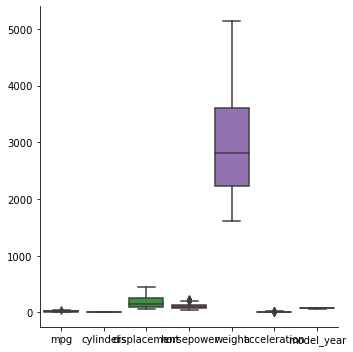

In [75]:
sns.catplot(data=mpg, kind="box")

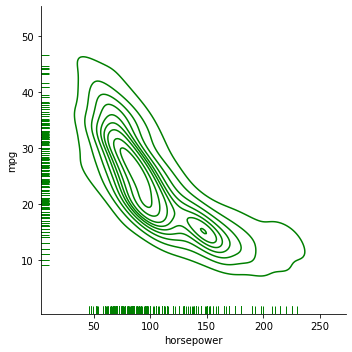

In [85]:
sns.displot(mpg, x="horsepower", y="mpg", kind="kde", rug=True, color = "green")

✅**Here for the iris dataset**

In [98]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [99]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


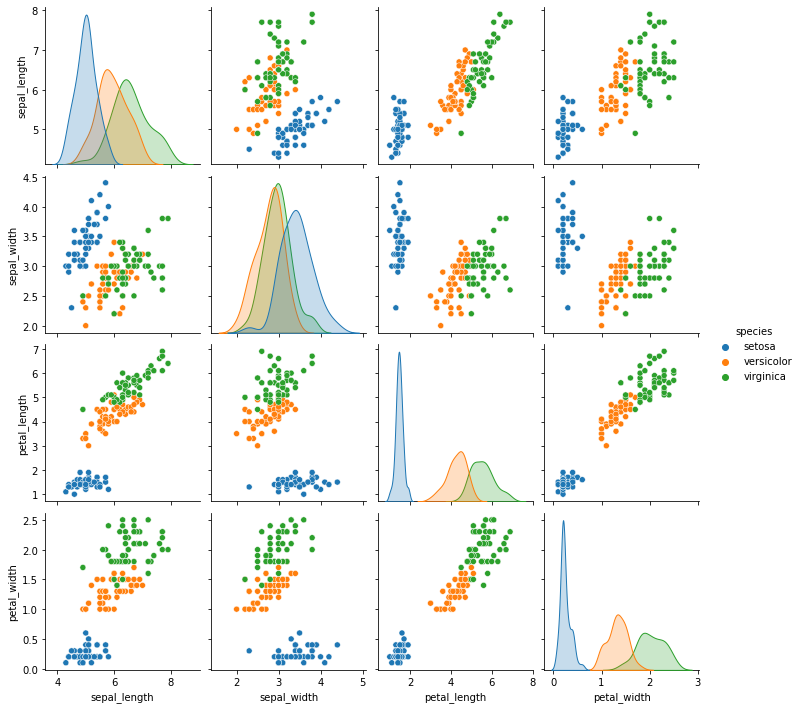

In [17]:
sns.pairplot(iris,hue = "species")

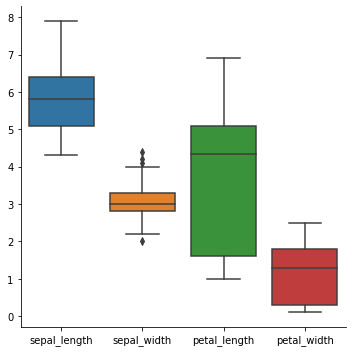

In [76]:
sns.catplot(data=iris, kind="box")

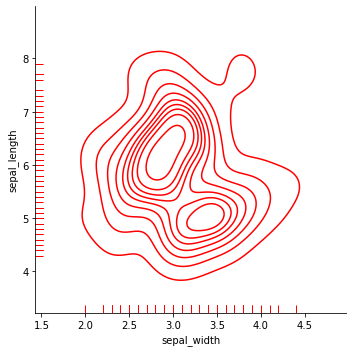

In [90]:
sns.displot(iris, x="sepal_width", y="sepal_length", kind="kde", rug=True, color = "red")

✅**Here for the digimon dataset**

In [100]:
digimon.head()

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
0,1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
1,2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
2,3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75
3,4,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61
4,5,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86


In [101]:
digimon.describe()

,Number,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,125.000000,11.987952,1.574297,1210.883534,109.779116,124.518072,116.377510,112.638554,120.401606
std,72.024301,6.616501,0.854012,326.102384,32.454115,45.639372,32.132696,41.562888,32.633339
min,1.000000,2.000000,0.000000,530.000000,50.000000,52.000000,59.000000,50.000000,61.000000
25%,63.000000,6.000000,1.000000,990.000000,84.000000,89.000000,93.000000,79.000000,92.000000
50%,125.000000,12.000000,1.000000,1180.000000,104.000000,119.000000,113.000000,104.000000,119.000000
75%,187.000000,18.000000,2.000000,1480.000000,132.000000,153.000000,138.000000,138.000000,143.000000
max,249.000000,25.000000,3.000000,2080.000000,203.000000,318.000000,213.000000,233.000000,218.000000


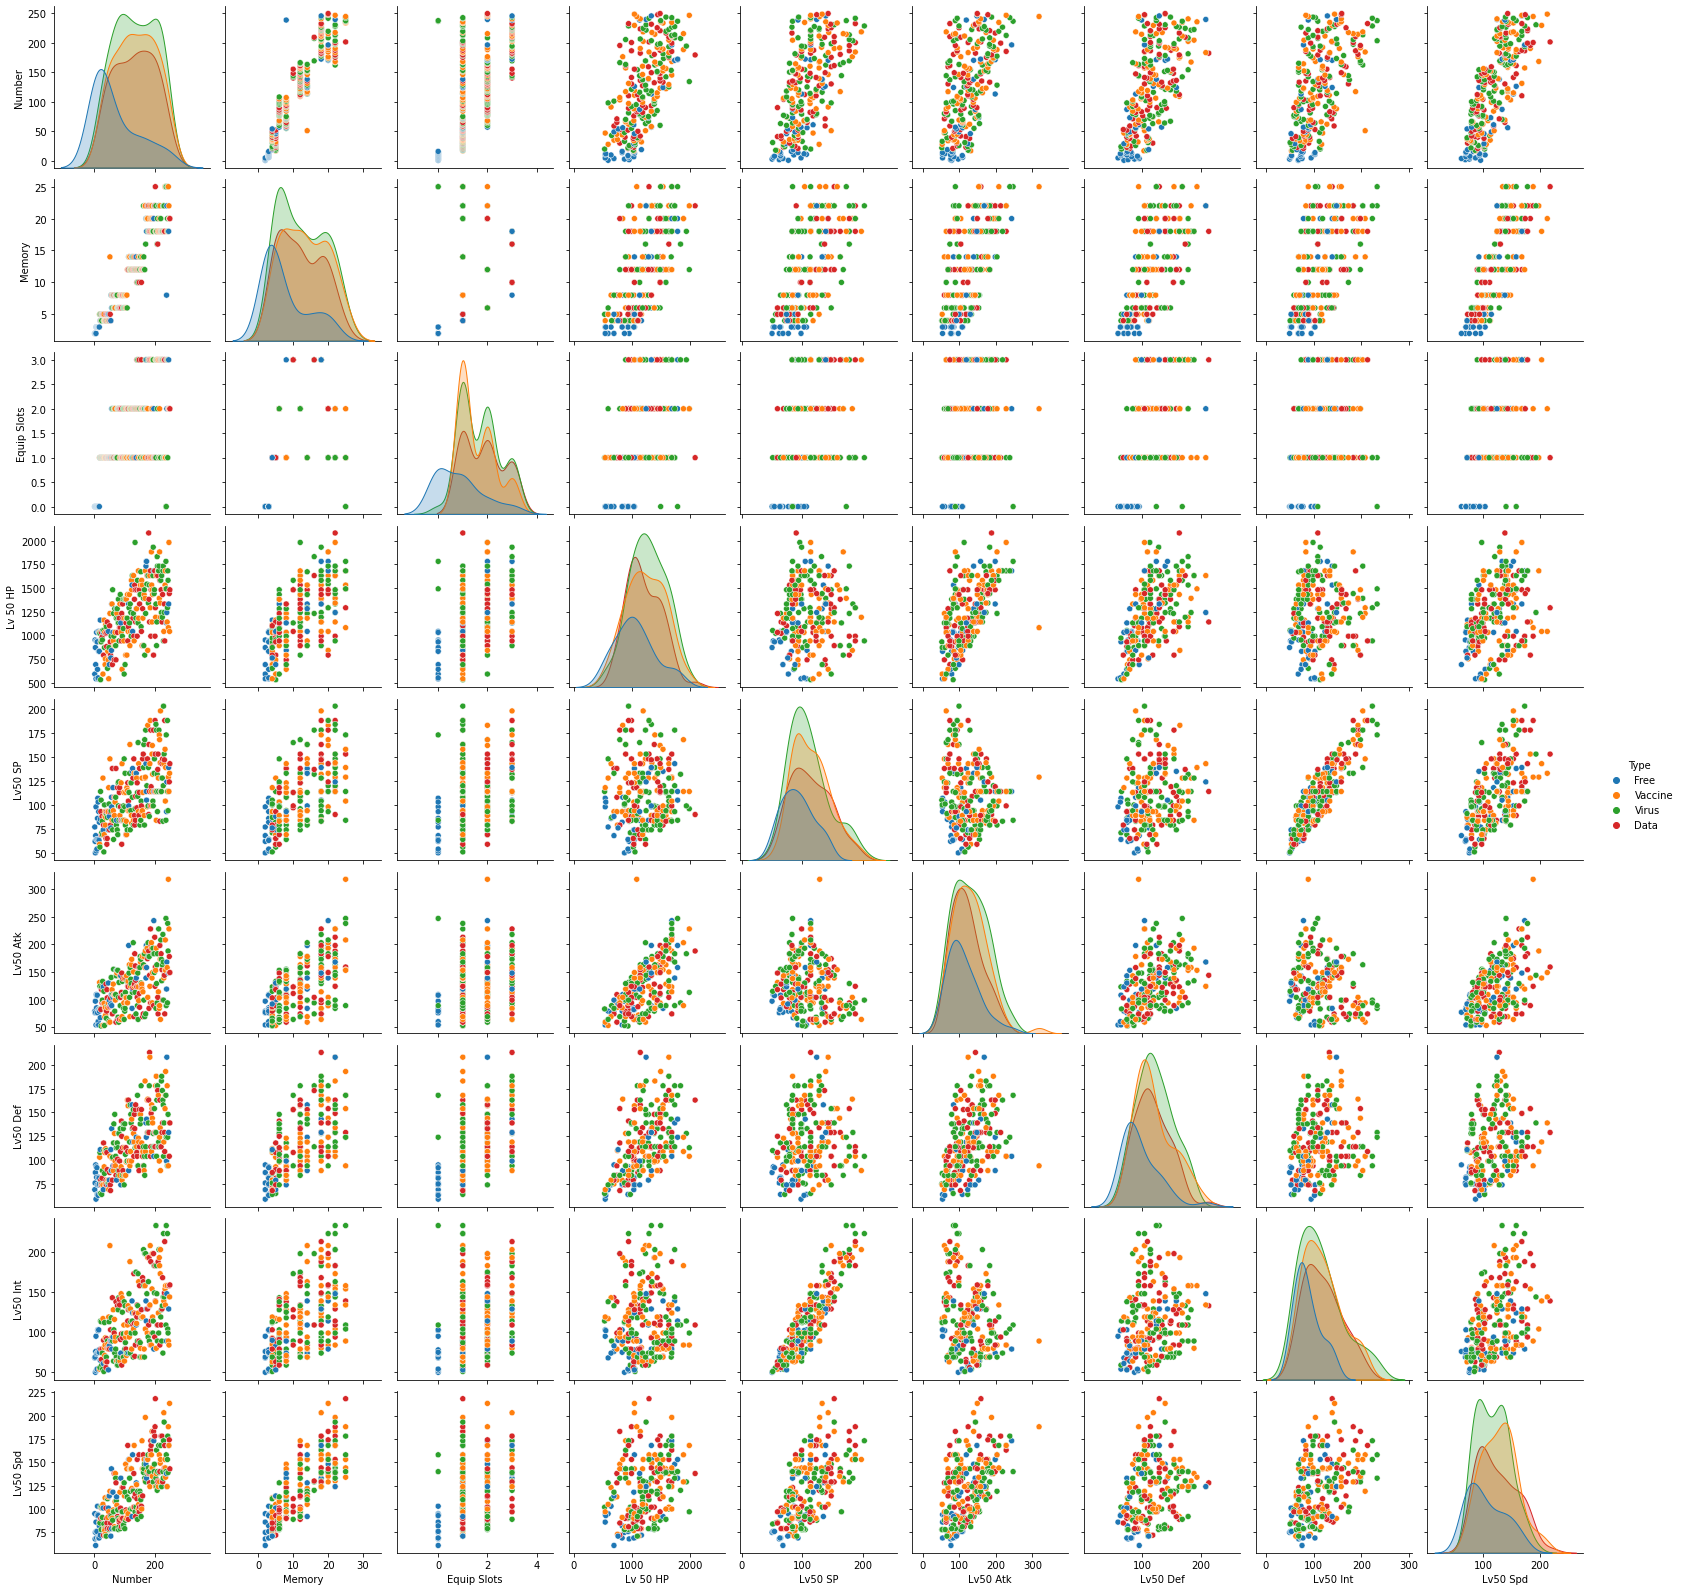

In [18]:
sns.pairplot(digimon, hue = "Type")

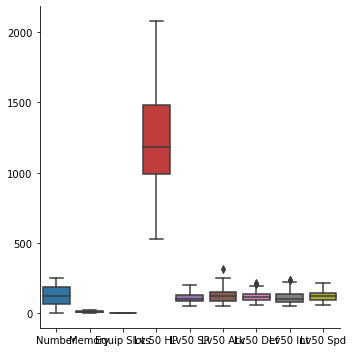

In [77]:
sns.catplot(data=digimon, kind="box")

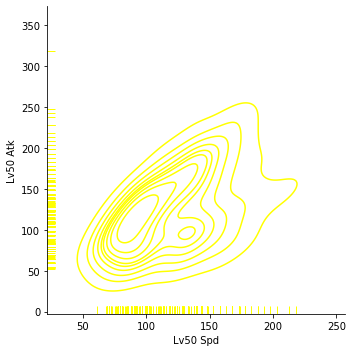

In [92]:
sns.displot(digimon, x="Lv50 Spd", y="Lv50 Atk", kind="kde", rug=True, color = "yellow")

✅**Here for the house price dataset**

In [102]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [103]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


(array([605., 160., 359.,  94.,  52.,  87.,   0.,   0.,  63.,  40.]),
 array([ 20.,  37.,  54.,  71.,  88., 105., 122., 139., 156., 173., 190.]),
 <BarContainer object of 10 artists>)

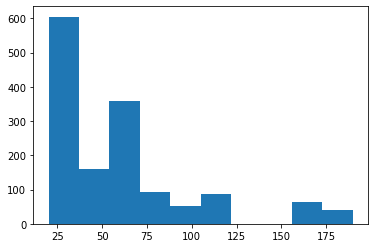

In [20]:
import matplotlib.pyplot as plt
plt.hist(house.MSSubClass)

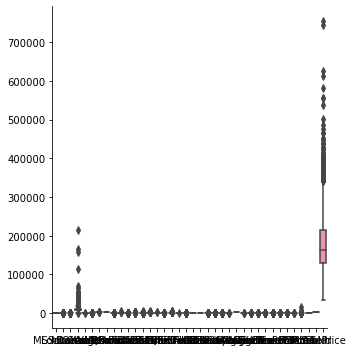

In [78]:
sns.catplot(data=house, kind="box")

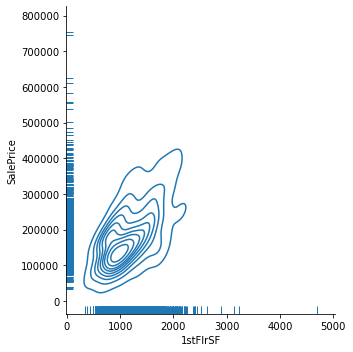

In [95]:
sns.displot(house, x="1stFlrSF", y="SalePrice", kind="kde", rug=True)

* based on what you see for these $4$, rank them according to which has the most likely success, in terms of an interesting narrative, versus least likely. 


✅Answer:

mpg > iris > digimon > house


If there are two topics that are nearly equal, you should consider using one of them for the second half of the semester. Or, if one topic is super interesting, you can use it for the machine learning project as well. 



____
![gh](https://miro.medium.com/max/1009/1*RKww7E3bI2YKr1Mww62skw.png)
## Problem #3 (5pts)
### connecting GitHub to Heroku


You should have a GitHub and Heroku account set up from the previous HW. 

The way this works is that Heroku deploys your web app to the world, so that anyone can use it, from the files you store at GitHub. This way it will work independent of you and your laptop. 

Making the connection between Heroku and GitHub is a little tricky, and we will do that next week. For this week, I just want to you start thinking about how this works. 

✍🏻 Watch these two videos and write in a markdown cell the steps you will follow next week. For example, what is a `requirements.txt` file and where should it be? 

In [2]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/nJHrSvYxzjE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [ ]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/kXvmqg8hc70" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

✅Answer:

* Setup requirements.txt so Heroku knows what library to download
* install pipreqs
* setup.txt copy and paste code from the blog
* procfile.txt copy and paste code from the blog
* download git
* download Heroku command interface
* add xlrd library to requirements.txt
* follow some command line prompt
* done.


____
![impute](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/60128/versions/2/screenshot.jpg)
## Problem #4 (10pts)
### missingness and imputation

✍🏻 Open a markdown cell and answer these questions:
1. define "imputation" in your own words,
2. what is "listwise deletion" and what are two potential problems with using it? 
3. how is "pairwise deletion" different from "listwise deletion", and what problems might it have? 
4. define "missingness", 
5. what are the three main types of missingness?
6. how is multiple imputation implemented? 
7. what is mean substitution, and what can go wrong? 
8. what is regression substitution, and what does it miss? 
9. what problem does stochastic regression solve?
10. rank from best to worst: MAR, MCAR, MNAR 


✅**Answer:**

1. "Imputation" means "input", means dealing with missingness.
2. "Listwise deletion" means drop rows. If the size of the dataset is small then we shouldn't be using listwise deletion. And We have to make sure the missingness is caused by MCAR to be able to use listwise deletion.
3. "Pairwise deletion" only drops the null observation, not entire row. But all method in pandas skip rows with missing values, so this is not so helpful when doing pandas analysis.
4. Either the position is null or NaN. Null means there shouldn't be any data, NaN means the posiition can store data but is currently not.
5. MAR, MCAR, MNAR.
6. Fit a model, replace missing value with appropriate data like mean or median, then repeat the steps again, until we fit a good model.
7. "Mean substitution" means using "mean" to replace the missing value. This method ignore the relationship between values in front and after the missing value, and it will cause a biased standard deviation.
8. "Regression substitution" means to build a regression model for the dataset first, then use the relationship of other variables in the dataset to replace the missing value. After replacing the missing value the regression model will have a perfect shape, with no residuals or error, which is overfit.
9. When we are working on a model where the error are independant of the variables, we use stochastic regression, as we can not set the variable to a desired level.
10. Since you didn't define what is "best", I will rank them from easiest to deal with to hardest to deal with: MNAR < MAR < MCAR, as if there is a reason for why the data is missing, we can use that reason to fill the blanks.


___
![bvg](https://scipython.com/static/media/uploads/blog/multivariate_gaussian/bivariate_gaussian.png)

## Problem #5 (10pts)

### surface, image and contour plots


One of the most useful functions in data science is the Gaussian, which may be referred to as a "normal distribution". The Gaussian is central to the way we think about the mean and the standard deviation; and, because of its nice mathematical properties. Multivariate Gaussians appear in many data science models (e.g., machine learning models, such as Gaussian Process Regression). 

Importantly for data science, we want to always use functions in an arbitrary number of dimensions.  For a Gaussian, we would refer to such a function as a multivariate Gaussian. We will cover the mathemtical details later in the semester. Today, we only wish to visualize a multivariate Gaussian to help us understand certain types of plots. 

✍🏻 In `matplotlib` plot the Gaussian:
$$ p(x) = \frac{1}{w\sqrt{2\pi}}e^{-(x - μ)^2/2w^2}.$$
Plot this function for several values of $μ$ and $w$; in a markdown cell, comment on the meaning of these two parameters. Be sure your plot has a title along the lines of "Gaussian/Normal Distributions". 


✅**Answer:**

* $μ$ means "mean"
* $w$ means "standard deviation"

✅Here I use a more complicated way to do the function.

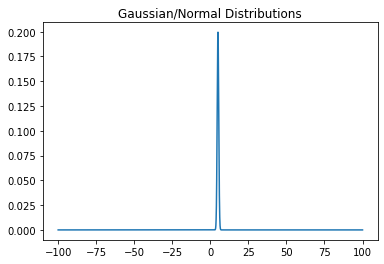

In [71]:
import scipy.stats as stats
import statistics
import math
  
x = np.linspace(-100,100,10000)

#here I set mean to be 5, std to be 2
y = (1/(2*np.sqrt(2*np.pi)))*math.e**(-(x-5)**2/2*(2**2))

plt.plot(x,y)
plt.title("Gaussian/Normal Distributions")
plt.show()

✅Then here I use an easier way which is stats.norm, it automaticlly set y for me

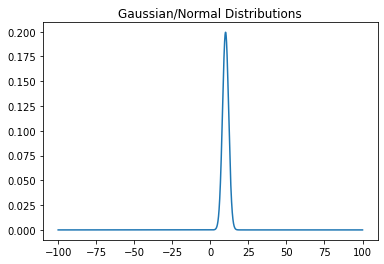

In [72]:
x = np.linspace(-100,100,10000)
  
#here I set mean to be 10, std to be 2
plt.plot(x, stats.norm.pdf(x, 10, 2))
plt.title("Gaussian/Normal Distributions")
plt.show()

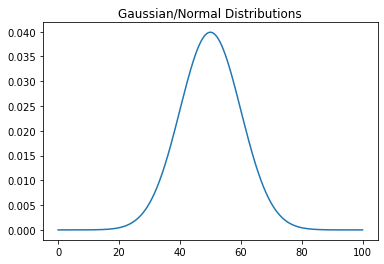

In [73]:
x = np.linspace(0,100,10000)

#here I set mean to be 50, std to be 10
plt.plot(x, stats.norm.pdf(x, 50, 10))
plt.title("Gaussian/Normal Distributions")
plt.show()


✍🏻 Next, make similar plots in 2D using a multivariate Gaussian:
$$p(x,y) = \frac{1}{w_xw_y 2\pi }e^{-(x - \mu_x)^2/2w_x^2-(y - \mu_y)^2/2w_y^2}.$$
This is a type of "bivariate Gaussian", because it is in 2D. In a markdown cell, write what $w_x$, $w_y$, $\mu_x$ and $\mu_y$ are. That is, what aspects of the bivariate Gaussian do they control? Make three types of plots:
* surface plot,
* contour plot,
* image plot. 
Use the same values in each so that you can compare these plots. The idea is that you learn how to interpret different types of visualizations that contain the same information. 

Change the values of the parameters ($w_x$, $w_y$, $\mu_x$ and $\mu_y$) in several plots so that you can build your intuition for both bivariate Gaussians and what these three visualization types do. 

_If you need a hint on some of the code, feel free to peek at the code below. If you use this code, add comments to indicate that you understand what it is doing, and be sure that it is PEP-8 compliant._

✅Answer:

* $w_x$ is the standard deviation of x
* $w_y$ is the standard deviation of y
* $\mu_x$ is the mean of x
* $\mu_y$ is the mean of y

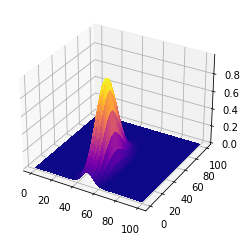

In [56]:
x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)
#set x and y
X, Y = np.meshgrid(x, y)
#make a matrix from x and y

#next set the values for mean and standard deviation for both x axies and y axies
mx = 50
my = 30
wx= 5
wy= 15

#from x and y we generate z, with Gaussian distribution
Z = np.exp(-(X-mx)**2/(2*wx**2) - (Y-my)**2/(2*wy**2))

#subplot set the rules for ploting function
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

#then call the plot
surf = ax.plot_surface(X, Y, Z, cmap="plasma", linewidth=0, antialiased=False)

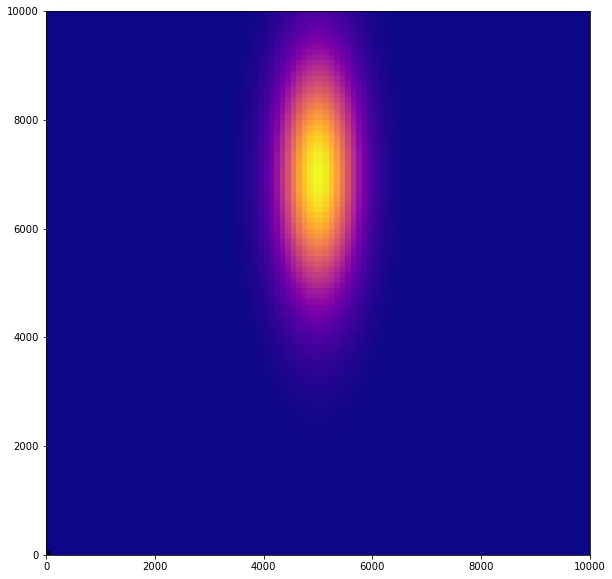

In [57]:
plt.figure(figsize=(20,10))
plt.contour(X, Y, Z, colors='black')
plt.imshow(Z, extent=[0, 10000, 0, 10000], origin='upper', cmap='plasma')

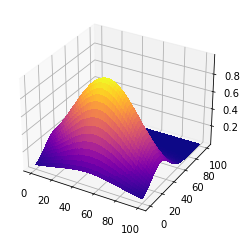

In [58]:
x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)
#set x and y
X, Y = np.meshgrid(x, y)
#make a matrix from x and y

#next set the values for mean and standard deviation for both x axies and y axies
mx = 50
my = 30
wx= 30
wy= 15

#from x and y we generate z, with Gaussian distribution
Z = np.exp(-(X-mx)**2/(2*wx**2) - (Y-my)**2/(2*wy**2))

#subplot set the rules for ploting function
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

#then call the plot
surf = ax.plot_surface(X, Y, Z, cmap="plasma", linewidth=0, antialiased=False)

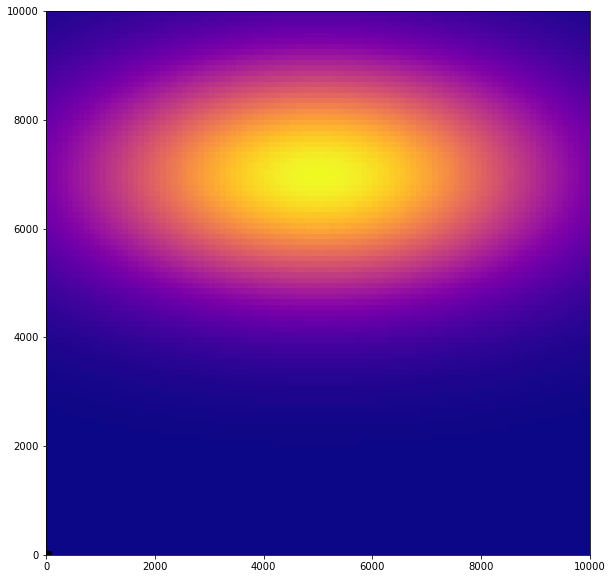

In [59]:
plt.figure(figsize=(20,10))
plt.contour(X, Y, Z, colors='black')
plt.imshow(Z, extent=[0, 10000, 0, 10000], origin='upper', cmap='plasma')

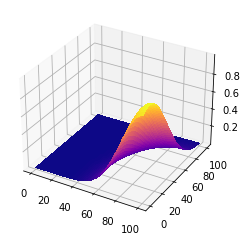

In [60]:
x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)
#set x and y
X, Y = np.meshgrid(x, y)
#make a matrix from x and y

#next set the values for mean and standard deviation for both x axies and y axies
mx = 100
my = 10
wx= 20
wy= 30

#from x and y we generate z, with Gaussian distribution
Z = np.exp(-(X-mx)**2/(2*wx**2) - (Y-my)**2/(2*wy**2))

#subplot set the rules for ploting function
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

#then call the plot
surf = ax.plot_surface(X, Y, Z, cmap="plasma", linewidth=0, antialiased=False)

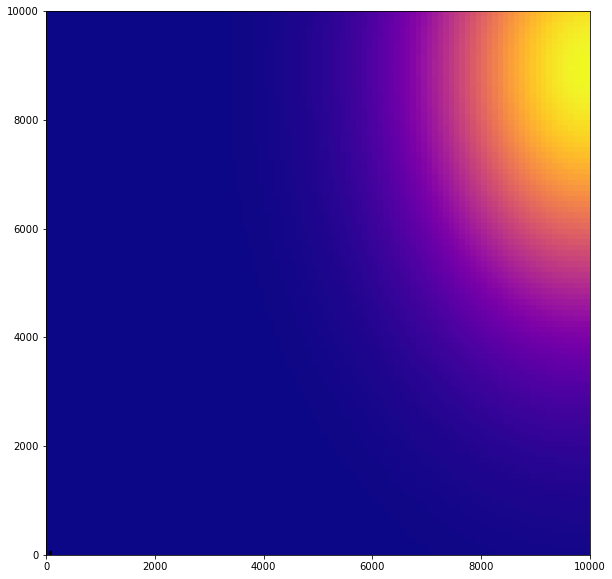

In [61]:
plt.figure(figsize=(20,10))
plt.contour(X, Y, Z, colors='black')
plt.imshow(Z, extent=[0, 10000, 0, 10000], origin='upper', cmap='plasma')

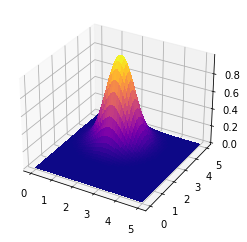

In [38]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)

mx = 2
my = 3.5
wx= 0.6
wy= 0.6

Z = np.exp(-(X-mx)**2/(2*wx**2) - (Y-my)**2/(2*wy**2))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap="plasma", linewidth=0, antialiased=False)

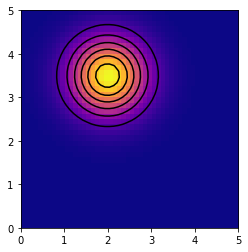

In [41]:
plt.contour(X, Y, Z, colors='black')
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='plasma');

____
![box](https://cdn1.byjus.com/wp-content/uploads/2020/10/Box-Plot-and-Whisker-Plot-1.png)
## Problem #6 (5pts)

### Violins and Boxes

✍🏻 Run the code below. In a markdown cell explain what the visualizations reveal to you. What story do you get? For example, why do you see the shapes that you see? How do you interpret these shapes? Do these two plots reveal the same information? Which one gives you more information? 

For your projects, you will want to choose the best visualization that tells the story you wish to tell.

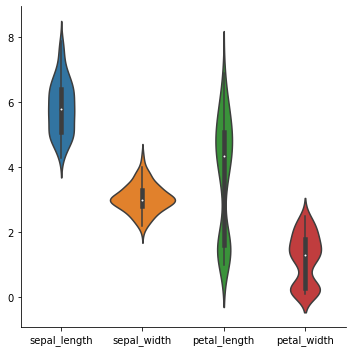

In [68]:
df_iris = sns.load_dataset("iris")

sns.catplot(data=df_iris, kind="violin")


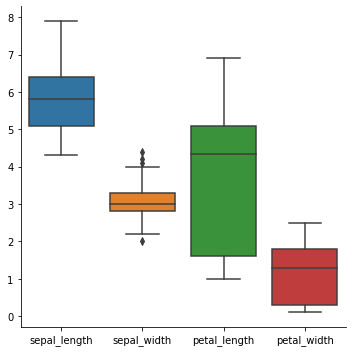

In [67]:
sns.catplot(data=df_iris, kind="box")

✅Answer:

* Sepal_width doesn't vary a lot in different species but pedal_length varies much between species.
* Box plot shows the destribution of the data points in a dataset by its category. 
* The violin plot is a combination of boxplot and kde estimate.
* We are able to track outliers with both methods, when violin plot help use to see the destribution of the variable within the category.
* In the center of both method, we see where the points are concentrated. Boxplot show where the points overall are and where the center is more clearly.
* But violin plot are limited by its small size, thus it cannot show the distribution well. So I prefer to draw another kde plot instead. Besides, violin plot looks strange and uncomfortable.